In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = "/content/drive/MyDrive/한전_데이터.csv"
df = pd.read_csv(file_path)

In [ ]:
print(df)

                     Date  LA00001  LA00002  LA00003  LA00004  LA00005  \
0     2014-12-01 00:00:00      1.9      2.5      2.0      7.0      2.0   
1     2014-12-01 00:01:00      2.0      2.5      2.2      7.0      2.3   
2     2014-12-01 00:02:00      1.7      2.3      2.2      7.5      2.0   
3     2014-12-01 00:03:00      1.9      2.3      2.0      7.2      2.2   
4     2014-12-01 00:04:00      1.9      2.6      2.0      7.6      2.0   
...                   ...      ...      ...      ...      ...      ...   
4315  2017-03-31 23:55:00      5.1      4.1      3.6      4.8      6.7   
4316  2017-03-31 23:56:00      5.2      4.1      3.5      4.7      6.9   
4317  2017-03-31 23:57:00      5.2      4.1      3.6      4.7      6.7   
4318  2017-03-31 23:58:00      5.2      4.1      3.5      4.7      6.6   
4319  2017-03-31 23:59:00      5.2      4.1      3.5      4.7      6.9   

      LA00006  LA00007  LA00008  LA00009  ...  LA01258  LA01259     LA01260  \
0         1.7      2.3      2.0 

In [ ]:
# 'date' 컬럼을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['Date'])
# 2017년 데이터만 필터링
df_2017 = df[df['date'].dt.year == 2017].copy()
# 'date' 컬럼 삭제
df_2017 = df_2017.drop('date', axis=1)
# 인덱스 재설정
df_2017 = df_2017.reset_index(drop=True)
# 'Date' 컬럼 삭제
df_2017 = df_2017.drop('Date', axis=1)
# 인덱스 재설정 (기존 인덱스를 삭제하고 새로운 숫자 인덱스를 생성)
df_2017 = df_2017.reset_index(drop=True)
df_2017.index = df_2017.index + 1
# 결과 확인
print(df_2017)

      LA00001  LA00002  LA00003  LA00004  LA00005  LA00006  LA00007  LA00008  \
1         5.2      4.1      3.3      4.5      6.7      5.4      4.2      5.4   
2         5.2      4.1      3.5      4.7      6.6      5.2      4.4      5.2   
3         5.1      4.1      3.5      4.4      6.7      5.2      4.1      5.4   
4         5.1      4.1      3.3      4.5      6.7      5.2      4.2      5.2   
5         5.2      4.2      3.3      4.7      6.6      5.2      4.4      5.4   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2876      5.1      4.1      3.6      4.8      6.7      5.1      4.4      5.4   
2877      5.2      4.1      3.5      4.7      6.9      5.4      4.4      5.4   
2878      5.2      4.1      3.6      4.7      6.7      5.1      4.5      5.4   
2879      5.2      4.1      3.5      4.7      6.6      5.4      4.4      5.4   
2880      5.2      4.1      3.5      4.7      6.9      5.5      4.5      5.4   

      LA00009  LA00010  ...  LA01258  L

In [ ]:
# 'abnormal' 컬럼을 제외한 나머지 컬럼 선택
# 만약 'abnormal' 컬럼이 존재하지 않는다면 이 부분에서 오류가 발생할 수 있습니다.
# 실제 컬럼 이름이 'abnormal'이 맞는지 확인해주세요.
other_columns = df_2017.columns.drop('abnormal')

# 선택된 컬럼들로 이루어진 임시 데이터프레임 생성
df_other_columns = df_2017[other_columns]

# 선택된 컬럼에 대해 분산 계산
column_variances = df_other_columns.var()

# 분산이 0.001보다 작은 컬럼 식별
cols_to_drop_var = column_variances[column_variances < 0.001].index

# 선택된 컬럼에 대해 고유값 개수 계산
column_unique_counts = df_other_columns.nunique()

# 고유값 개수가 3인 컬럼 식별
cols_to_drop_unique = column_unique_counts[column_unique_counts == 3].index

# 두 조건 중 하나라도 만족하는 컬럼 통합
# set을 이용하여 중복 없이 컬럼 이름을 저장합니다.
cols_to_drop_combined = list(set(cols_to_drop_var).union(set(cols_to_drop_unique)))

# 원본 df_2017에서 해당 컬럼 삭제
df_2017 = df_2017.drop(columns=cols_to_drop_combined)

# 결과 확인
print(df_2017)

      LA00001  LA00002  LA00003  LA00004  LA00005  LA00006  LA00007  LA00008  \
1         5.2      4.1      3.3      4.5      6.7      5.4      4.2      5.4   
2         5.2      4.1      3.5      4.7      6.6      5.2      4.4      5.2   
3         5.1      4.1      3.5      4.4      6.7      5.2      4.1      5.4   
4         5.1      4.1      3.3      4.5      6.7      5.2      4.2      5.2   
5         5.2      4.2      3.3      4.7      6.6      5.2      4.4      5.4   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2876      5.1      4.1      3.6      4.8      6.7      5.1      4.4      5.4   
2877      5.2      4.1      3.5      4.7      6.9      5.4      4.4      5.4   
2878      5.2      4.1      3.6      4.7      6.7      5.1      4.5      5.4   
2879      5.2      4.1      3.5      4.7      6.6      5.4      4.4      5.4   
2880      5.2      4.1      3.5      4.7      6.9      5.5      4.5      5.4   

      LA00009  LA00010  ...  LA01247  L

In [ ]:
# df_2017 데이터프레임 전치
df_2017_T = df_2017.transpose()

In [ ]:
# 결과 확인
print(df_2017_T)

                  1             2             3             4     \
LA00001   5.200000e+00  5.200000e+00  5.100000e+00  5.100000e+00   
LA00002   4.100000e+00  4.100000e+00  4.100000e+00  4.100000e+00   
LA00003   3.300000e+00  3.500000e+00  3.500000e+00  3.300000e+00   
LA00004   4.500000e+00  4.700000e+00  4.400000e+00  4.500000e+00   
LA00005   6.700000e+00  6.600000e+00  6.700000e+00  6.700000e+00   
...                ...           ...           ...           ...   
LA01257   1.317880e+09  1.317880e+09  1.317880e+09  1.317880e+09   
LA01259   1.602900e+04  1.603400e+04  1.604000e+04  1.604600e+04   
LA01263   4.520000e+02  4.580000e+02  4.640000e+02  4.700000e+02   
LA01264   8.790000e+02  8.790000e+02  8.790000e+02  8.790000e+02   
abnormal  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                  5             6             7             8     \
LA00001   5.200000e+00  5.100000e+00  5.200000e+00  5.100000e+00   
LA00002   4.200000e+00  4.200000e+00  4.400000e

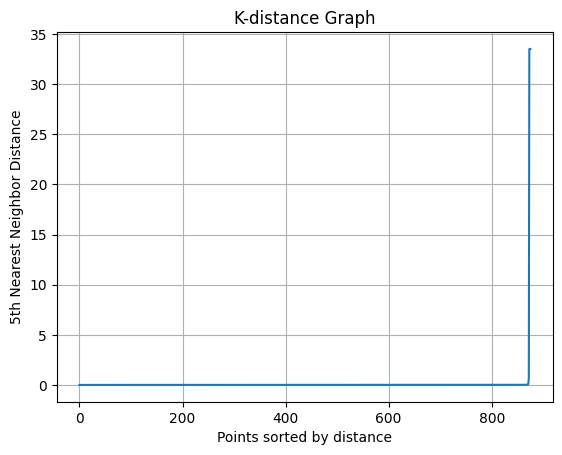

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_2017_T) # Scale df_2017_T

# min_samples = 5라고 가정
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# 5번째 이웃 거리 정렬
distances = np.sort(distances[:, 2])
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-distance Graph")
plt.grid()
plt.show()

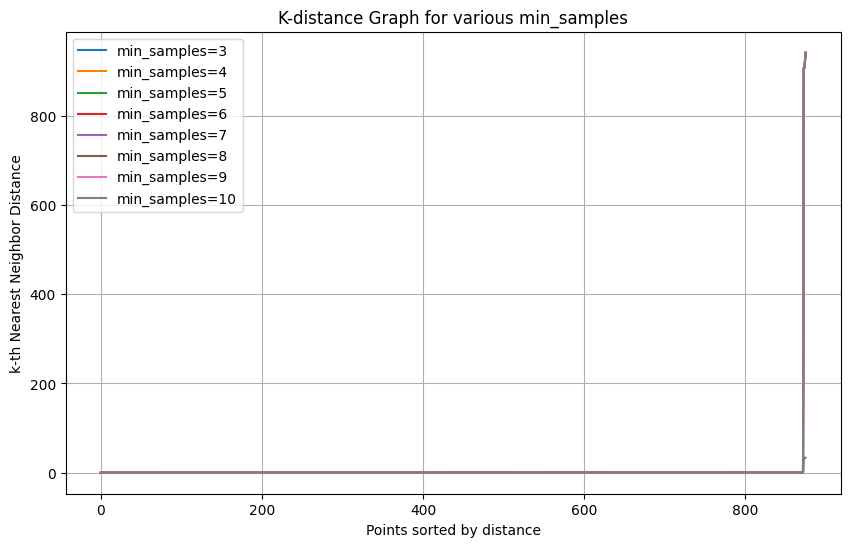

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# 전처리된 df_2017_T 를 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_2017_T)

# 다양한 min_samples 값을 테스트 (예: 3 ~ 10)
min_samples_list = list(range(3, 11))

plt.figure(figsize=(10, 6))
for min_s in min_samples_list:
    neighbors = NearestNeighbors(n_neighbors=min_s)
    neighbors_fit = neighbors.fit(data_scaled)
    distances, indices = neighbors_fit.kneighbors(data_scaled)
    distances = np.sort(distances[:, min_s - 1])  # min_s 번째 이웃 거리
    plt.plot(distances, label=f'min_samples={min_s}')

plt.xlabel("Points sorted by distance")
plt.ylabel("k-th Nearest Neighbor Distance")
plt.title("K-distance Graph for various min_samples")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np

# 데이터 준비: 변수 클러스터링을 위해 전치된 데이터프레임 사용
# 'abnormal' 컬럼을 변수 클러스터링에서 제외하려면, 전치된 데이터프레임에서 해당 열을 제외해야 합니다.
# 원본 df_2017에서 'abnormal' 컬럼을 먼저 제외하고 전치시키는 것이 더 명확할 수 있습니다.

# 원본 df_2017에서 'abnormal' 컬럼 제외 (변수 클러스터링에 사용하지 않으려면)
if 'abnormal' in df_2017.columns:
    df_for_var_clustering = df_2017.drop('abnormal', axis=1)
else:
    print("경고: 'abnormal' 컬럼이 데이터프레임에 없습니다. 모든 변수로 클러스터링을 진행합니다.")
    df_for_var_clustering = df_2017.copy()

# 변수 클러스터링을 위해 전치
X_vars = df_for_var_clustering.transpose()

# DBSCAN 모델 생성 및 적용 (변수 데이터에 대해 DBSCAN 적용)
# eps와 min_samples 값은 변수 데이터에 따라 조정해야 합니다.
dbscan_vars = DBSCAN(eps=950, min_samples=3) # 예시 값 (변수의 개수가 적을 수 있으므로 min_samples를 작게 설정)
clusters_vars = dbscan_vars.fit_predict(X_vars)

# 클러스터링 결과를 변수 이름과 함께 확인
var_cluster_results = pd.DataFrame({'Variable': X_vars.index, 'Cluster': clusters_vars})

# 결과 확인
print("DBSCAN 변수 클러스터링 결과 (변수 및 클러스터 레이블):")
print(var_cluster_results)

print("\n클러스터별 변수 개수:")
print(var_cluster_results['Cluster'].value_counts())

print("\n각 클러스터에 속한 변수:")
for cluster_id in sorted(var_cluster_results['Cluster'].unique()):
    vars_in_cluster = var_cluster_results[var_cluster_results['Cluster'] == cluster_id]['Variable'].tolist()
    print(f"클러스터 {cluster_id}: {vars_in_cluster}")

DBSCAN 변수 클러스터링 결과 (변수 및 클러스터 레이블):
    Variable  Cluster
0    LA00001        0
1    LA00002        0
2    LA00003        0
3    LA00004        0
4    LA00005        0
..       ...      ...
870  LA01256       -1
871  LA01257       -1
872  LA01259       -1
873  LA01263       -1
874  LA01264       -1

[875 rows x 2 columns]

클러스터별 변수 개수:
Cluster
 0     540
-1     196
 2      21
 3      20
 7      18
 1      16
 9      15
 13     10
 8       8
 5       6
 15      6
 6       4
 4       3
 11      3
 10      3
 14      3
 12      3
Name: count, dtype: int64

각 클러스터에 속한 변수:
클러스터 -1: ['LA00373', 'LA00374', 'LA00375', 'LA00376', 'LA00377', 'LA00378', 'LA00379', 'LA00380', 'LA00381', 'LA00382', 'LA00383', 'LA00384', 'LA00385', 'LA00386', 'LA00387', 'LA00388', 'LA00389', 'LA00390', 'LA00391', 'LA00392', 'LA00393', 'LA00394', 'LA00395', 'LA00396', 'LA00397', 'LA00398', 'LA00399', 'LA00400', 'LA00401', 'LA00402', 'LA00403', 'LA00404', 'LA00405', 'LA00406', 'LA00407', 'LA00408', 'LA00409', 'LA00410

In [ ]:
# 1. 클러스터별 변수 수 계산
cluster_counts = var_cluster_results['Cluster'].value_counts()

# 2. 제거 대상 클러스터 구분
remove_clusters = cluster_counts[cluster_counts <= 3].index
uncertain_clusters = cluster_counts[(cluster_counts > 3) & (cluster_counts <= 10)].index
stable_clusters = cluster_counts[cluster_counts > 10].index

# 3. 분류된 클러스터 별 변수 추출
vars_remove = var_cluster_results[var_cluster_results['Cluster'].isin(remove_clusters)]
vars_uncertain = var_cluster_results[var_cluster_results['Cluster'].isin(uncertain_clusters)]
vars_stable = var_cluster_results[var_cluster_results['Cluster'].isin(stable_clusters)]

# 4. 결과 출력
print("\n🔴 제거할 클러스터들 (3개 이하):")
for cid in remove_clusters:
    print(f" - 클러스터 {cid}: {cluster_counts[cid]}개 변수")

print("\n🟡 조건부 제거 대상 (4~10개):")
for cid in uncertain_clusters:
    print(f" - 클러스터 {cid}: {cluster_counts[cid]}개 변수")

print("\n🟢 안정된 클러스터 (10개 초과):")
for cid in stable_clusters:
    print(f" - 클러스터 {cid}: {cluster_counts[cid]}개 변수")

# 5. 필터링된 결과 사용 예시
# 예: 안정된 클러스터만 분석에 사용하고 싶다면:
filtered_vars = var_cluster_results[var_cluster_results['Cluster'].isin(stable_clusters)]
print("\n✅ 분석에 사용할 변수 목록 (안정된 클러스터 포함):")
print(filtered_vars['Variable'].tolist())


🔴 제거할 클러스터들 (3개 이하):
 - 클러스터 4: 3개 변수
 - 클러스터 11: 3개 변수
 - 클러스터 10: 3개 변수
 - 클러스터 14: 3개 변수
 - 클러스터 12: 3개 변수

🟡 조건부 제거 대상 (4~10개):
 - 클러스터 13: 10개 변수
 - 클러스터 8: 8개 변수
 - 클러스터 5: 6개 변수
 - 클러스터 15: 6개 변수
 - 클러스터 6: 4개 변수

🟢 안정된 클러스터 (10개 초과):
 - 클러스터 0: 540개 변수
 - 클러스터 -1: 196개 변수
 - 클러스터 2: 21개 변수
 - 클러스터 3: 20개 변수
 - 클러스터 7: 18개 변수
 - 클러스터 1: 16개 변수
 - 클러스터 9: 15개 변수

✅ 분석에 사용할 변수 목록 (안정된 클러스터 포함):
['LA00001', 'LA00002', 'LA00003', 'LA00004', 'LA00005', 'LA00006', 'LA00007', 'LA00008', 'LA00009', 'LA00010', 'LA00011', 'LA00012', 'LA00013', 'LA00014', 'LA00015', 'LA00016', 'LA00017', 'LA00018', 'LA00019', 'LA00020', 'LA00021', 'LA00022', 'LA00023', 'LA00024', 'LA00025', 'LA00026', 'LA00027', 'LA00028', 'LA00030', 'LA00031', 'LA00032', 'LA00033_target', 'LA00034_target', 'LA00035_target', 'LA00036_target', 'LA00037_target', 'LA00038_target', 'LA00039_target', 'LA00040_target', 'LA00041_target', 'LA00042_target', 'LA00043_target', 'LA00044_target', 'LA00045_target', 'LA00046_target', 'L

In [ ]:
# 클러스터별로 변수 묶어서 딕셔너리 형태로 정리
clustered_variable_groups = {
    cluster_id: group['Variable'].tolist()
    for cluster_id, group in var_cluster_results.groupby('Cluster')
    if cluster_id not in remove_clusters
}

# 예시 출력
for cid, variables in clustered_variable_groups.items():
    print(f"\n클러스터 {cid} 변수 ({len(variables)}개):")
    print(variables)


클러스터 -1 변수 (196개):
['LA00373', 'LA00374', 'LA00375', 'LA00376', 'LA00377', 'LA00378', 'LA00379', 'LA00380', 'LA00381', 'LA00382', 'LA00383', 'LA00384', 'LA00385', 'LA00386', 'LA00387', 'LA00388', 'LA00389', 'LA00390', 'LA00391', 'LA00392', 'LA00393', 'LA00394', 'LA00395', 'LA00396', 'LA00397', 'LA00398', 'LA00399', 'LA00400', 'LA00401', 'LA00402', 'LA00403', 'LA00404', 'LA00405', 'LA00406', 'LA00407', 'LA00408', 'LA00409', 'LA00410', 'LA00411', 'LA00412', 'LA00413', 'LA00414', 'LA00415', 'LA00416', 'LA00417', 'LA00418', 'LA00419', 'LA00420', 'LA00421', 'LA00422', 'LA00423', 'LA00424', 'LA00425', 'LA00426', 'LA00427', 'LA00428', 'LA00429', 'LA00430', 'LA00431', 'LA00432', 'LA00433', 'LA00434', 'LA00435', 'LA00436', 'LA00437', 'LA00438', 'LA00439', 'LA00440', 'LA00441', 'LA00442', 'LA00443', 'LA00444', 'LA00445', 'LA00446', 'LA00447', 'LA00448', 'LA00449', 'LA00450', 'LA00451', 'LA00452', 'LA00453', 'LA00454', 'LA00455', 'LA00456', 'LA00457', 'LA00458', 'LA00459', 'LA00460', 'LA00461', 

📊 Cluster -1 - 변수 개수: 196개
   → 평균 절댓값 상관계수: 0.185


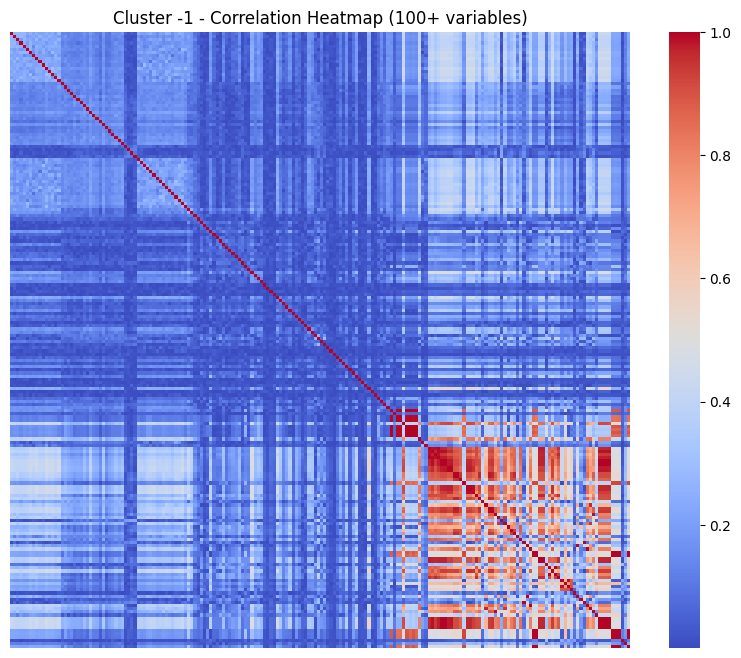

📊 Cluster 0 - 변수 개수: 540개
   → 평균 절댓값 상관계수: 0.517


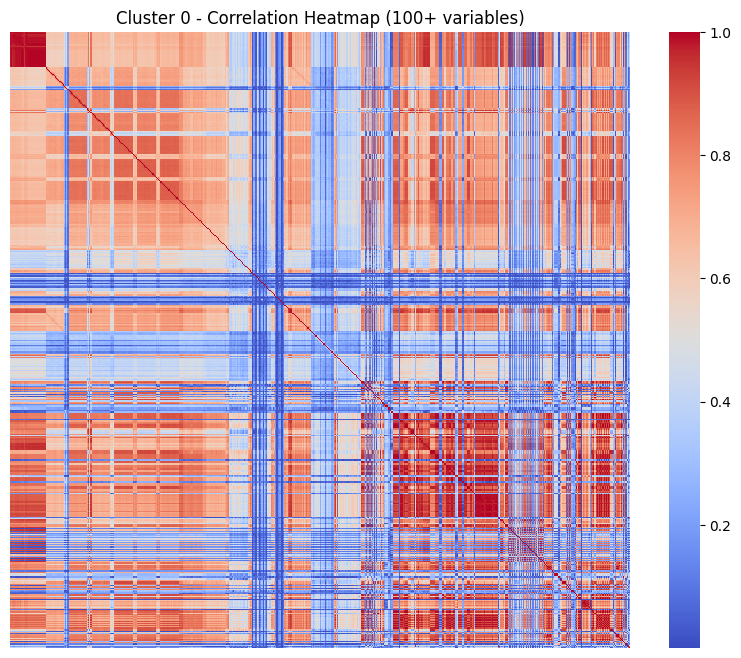

📊 Cluster 1 - 변수 개수: 16개
   → 평균 절댓값 상관계수: 0.987


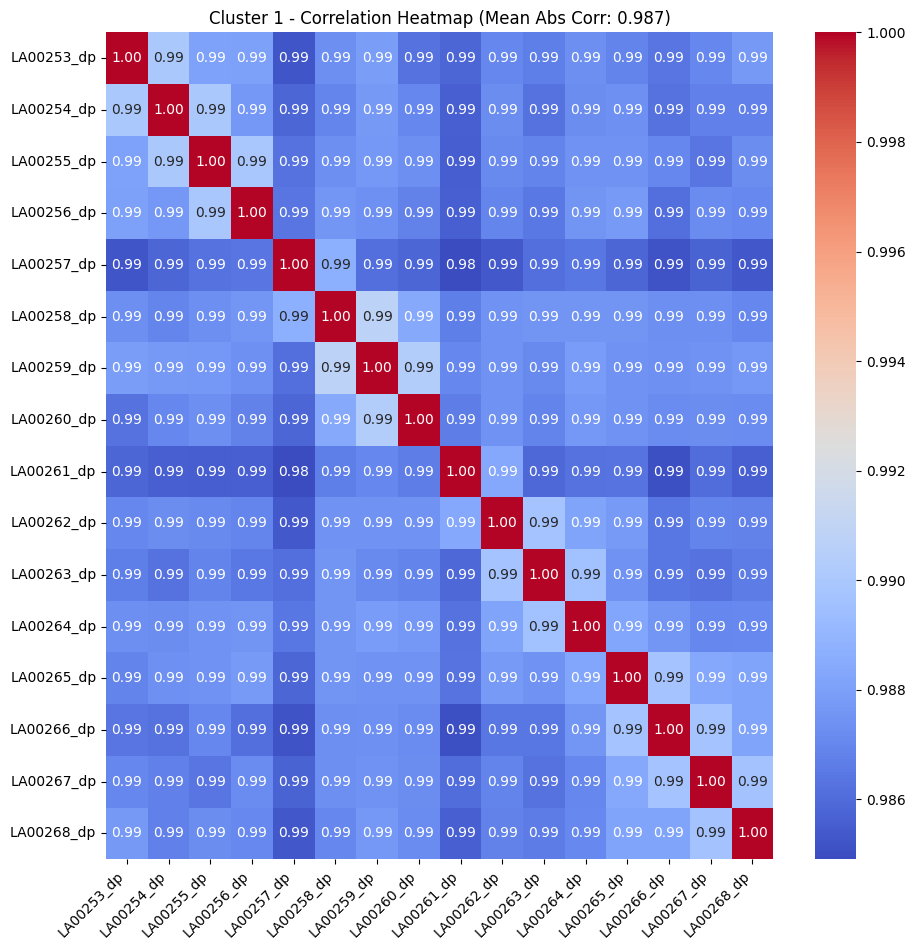

📊 Cluster 2 - 변수 개수: 21개
   → 평균 절댓값 상관계수: 0.292


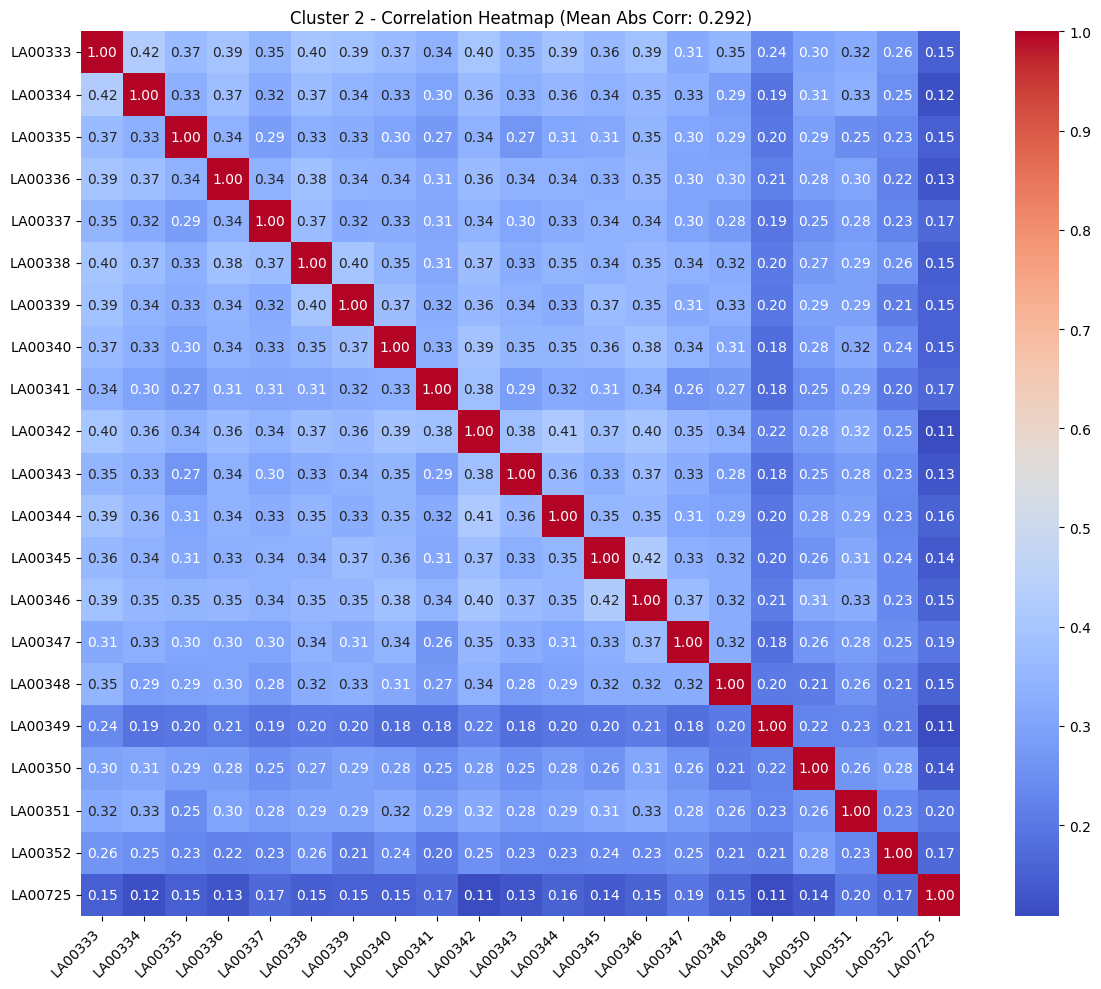

📊 Cluster 3 - 변수 개수: 20개
   → 평균 절댓값 상관계수: 0.152


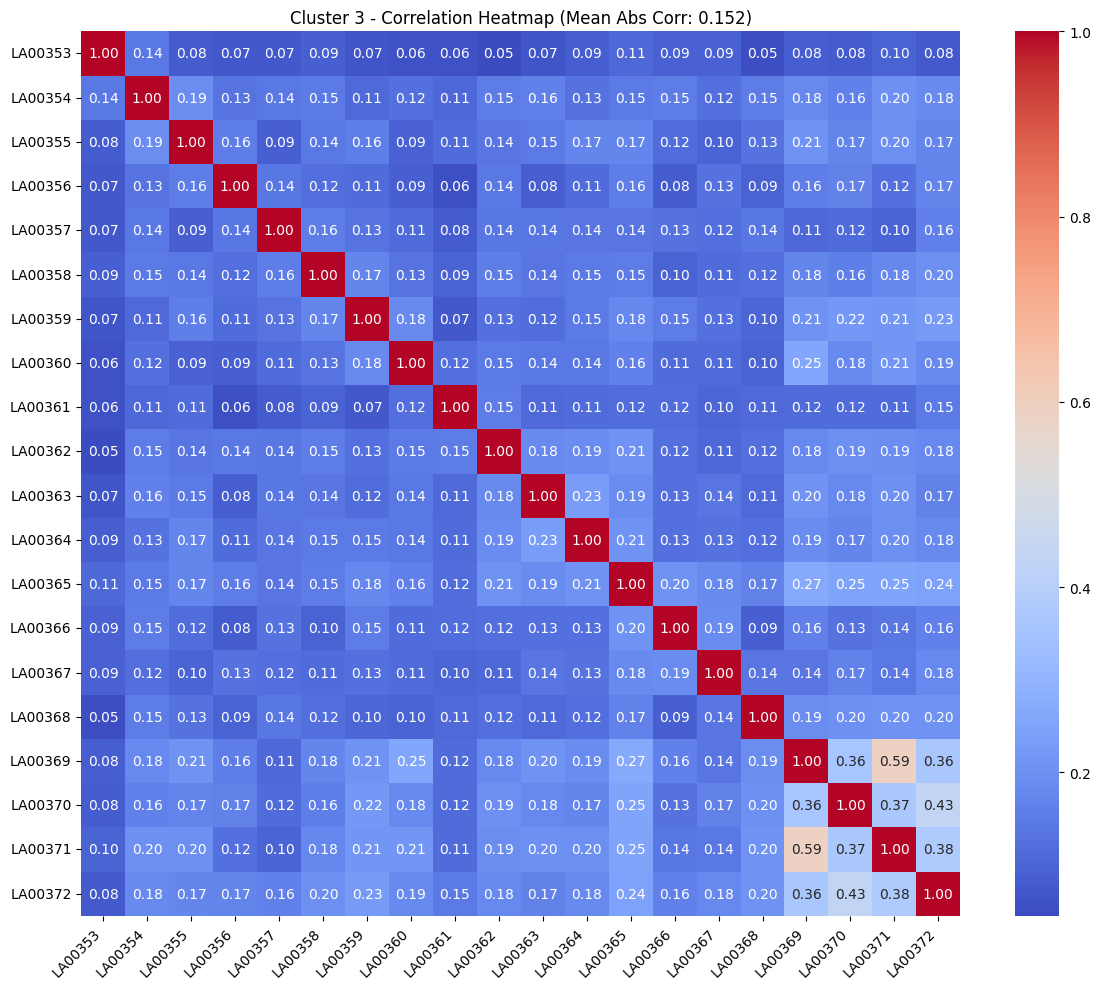

📊 Cluster 5 - 변수 개수: 6개
   → 평균 절댓값 상관계수: 1.000


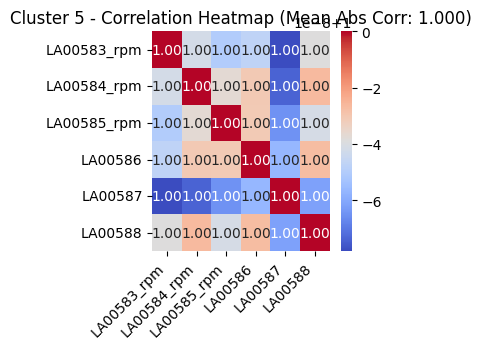

📊 Cluster 6 - 변수 개수: 4개
   → 평균 절댓값 상관계수: 1.000


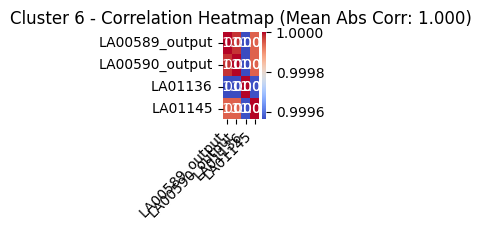

📊 Cluster 7 - 변수 개수: 18개
   → 평균 절댓값 상관계수: 0.999


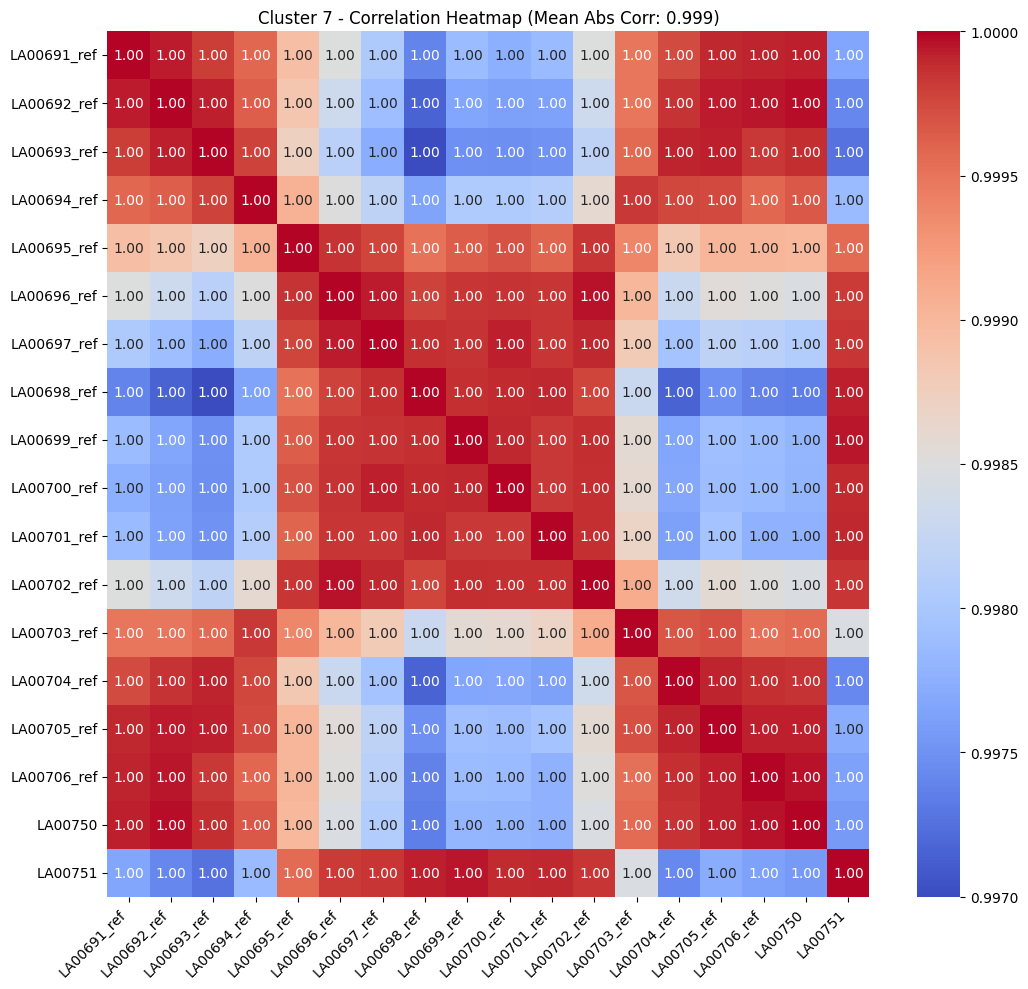

📊 Cluster 8 - 변수 개수: 8개
   → 평균 절댓값 상관계수: 0.999


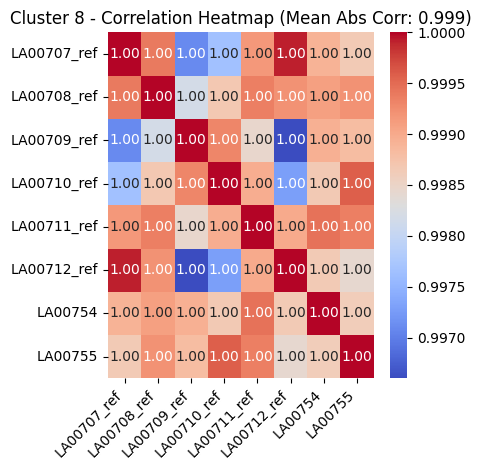

📊 Cluster 9 - 변수 개수: 15개
   → 평균 절댓값 상관계수: 0.957


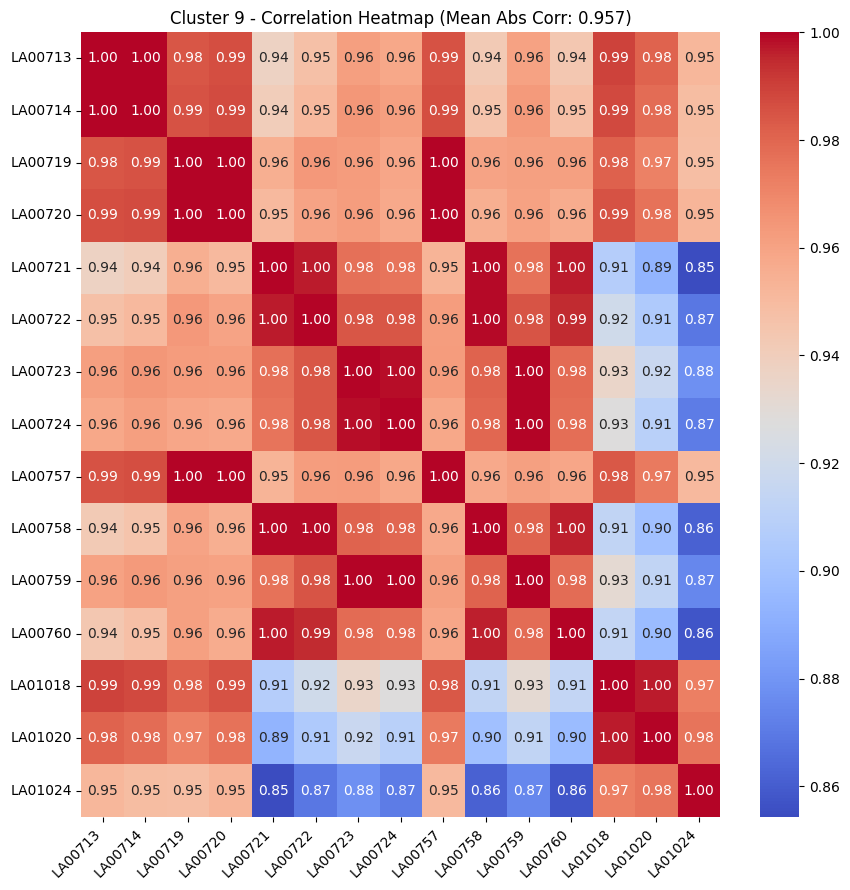

📊 Cluster 13 - 변수 개수: 10개
   → 평균 절댓값 상관계수: 0.959


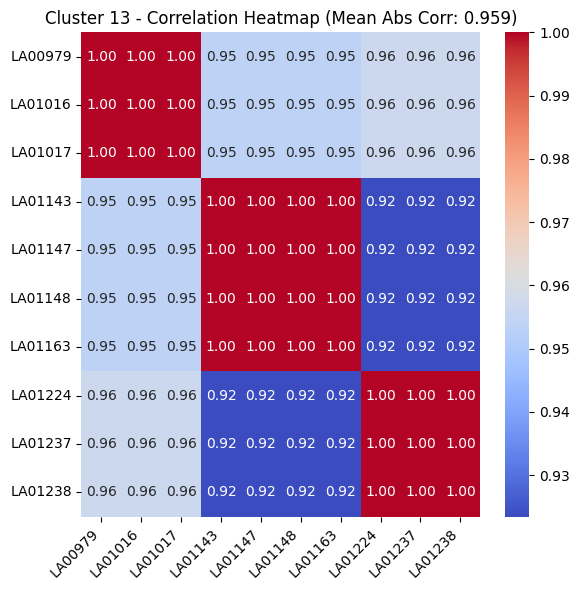

📊 Cluster 15 - 변수 개수: 6개
   → 평균 절댓값 상관계수: 1.000


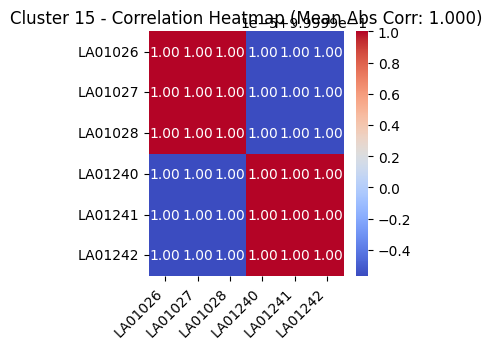

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for cid, variables in clustered_variable_groups.items():
    if len(variables) < 2:
        continue  # 1개 이하면 스킵

    subset = df_for_var_clustering[variables]
    corr_matrix = subset.corr().abs()  # 절댓값 상관계수
    mean_corr = corr_matrix.where(~np.eye(len(corr_matrix), dtype=bool)).mean().mean()

    print(f"📊 Cluster {cid} - 변수 개수: {len(variables)}개")
    print(f"   → 평균 절댓값 상관계수: {mean_corr:.3f}")

    # 100개 이상이면 간략화된 히트맵 (컬러만, 숫자 생략)
    if len(variables) >= 100:
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True, xticklabels=False, yticklabels=False)
        plt.title(f"Cluster {cid} - Correlation Heatmap (100+ variables)")
        plt.show()

    else:  # 변수 수 적으면 full 히트맵 (숫자 포함)
        plt.figure(figsize=(min(12, len(variables)*0.6), min(10, len(variables)*0.6)))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f"Cluster {cid} - Correlation Heatmap (Mean Abs Corr: {mean_corr:.3f})")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [ ]:
import numpy as np
import pandas as pd

# 유지할 변수명을 담을 리스트
final_variable_list = []

# 조건 만족 클러스터 저장
kept_clusters = []

# 반복하면서 평가
for cid, variables in clustered_variable_groups.items():
    if len(variables) < 5:
        continue  # 변수 수 5개 미만이면 제거

    subset = df_for_var_clustering[variables]
    corr_matrix = subset.corr().abs()  # 절댓값 상관계수
    mean_corr = corr_matrix.where(~np.eye(len(corr_matrix), dtype=bool)).mean().mean()

    if mean_corr > 0.8:
        final_variable_list.extend(variables)
        kept_clusters.append(cid)

        print(f"✅ 클러스터 {cid} 유지됨 | 변수 {len(variables)}개 | 평균 상관: {mean_corr:.3f}")
    else:
        print(f"❌ 클러스터 {cid} 제거됨 | 평균 상관: {mean_corr:.3f}")

# 최종 데이터프레임 구성
df_selected_final = df_for_var_clustering[final_variable_list]

# 요약 출력
print("\n📌 최종 유지된 클러스터 수:", len(kept_clusters))
print("📌 최종 변수 수:", len(final_variable_list))
print("📌 최종 데이터프레임 shape:", df_selected_final.shape)

❌ 클러스터 -1 제거됨 | 평균 상관: 0.185
❌ 클러스터 0 제거됨 | 평균 상관: 0.517
✅ 클러스터 1 유지됨 | 변수 16개 | 평균 상관: 0.987
❌ 클러스터 2 제거됨 | 평균 상관: 0.292
❌ 클러스터 3 제거됨 | 평균 상관: 0.152
✅ 클러스터 5 유지됨 | 변수 6개 | 평균 상관: 1.000
✅ 클러스터 7 유지됨 | 변수 18개 | 평균 상관: 0.999
✅ 클러스터 8 유지됨 | 변수 8개 | 평균 상관: 0.999
✅ 클러스터 9 유지됨 | 변수 15개 | 평균 상관: 0.957
✅ 클러스터 13 유지됨 | 변수 10개 | 평균 상관: 0.959
✅ 클러스터 15 유지됨 | 변수 6개 | 평균 상관: 1.000

📌 최종 유지된 클러스터 수: 7
📌 최종 변수 수: 79
📌 최종 데이터프레임 shape: (2880, 79)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

for cid in kept_clusters:
    variables = clustered_variable_groups[cid]
    if len(variables) < 2:
        continue  # PCA 불가

    print(f"\n📊 [클러스터 {cid}] - 변수 개수: {len(variables)}")

    # 1. 해당 클러스터 데이터 추출 및 표준화
    X_cluster = df_for_var_clustering[variables].copy()
    X_scaled = StandardScaler().fit_transform(X_cluster)

    # 2. PCA 적용
    pca = PCA()
    pca.fit(X_scaled)

    # 3. 누적 설명력 계산
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(cumulative_variance >= 0.8) + 1

    print(f"✅ 설명력 80%에 도달하는 최소 주성분 수: {num_components}")

    # 4. 각 주성분별 기여도 (절댓값 기준)
    component_vars = []
    for i in range(num_components):
        comp = np.abs(pca.components_[i])
        sorted_idx = comp.argsort()[::-1]
        top_variables = [variables[idx] for idx in sorted_idx[:5]]  # 상위 기여 변수 5개
        component_vars.append(top_variables)

        print(f"  - PC{i+1} 주요 변수: {top_variables}")

    # (선택) 주성분별 설명력 출력
    for i in range(num_components):
        print(f"    - PC{i+1} 설명력: {pca.explained_variance_ratio_[i]:.4f}")


# 중복 제거 후 최종 변수 리스트
important_vars = []
final_selected_vars = list(set(important_vars))

# 최종 변수 기반 데이터프레임 구성
df_selected_final_revised = df_for_var_clustering[final_selected_vars]

# 확인
print(f"\n✅ 최종 선택된 변수 수: {len(final_selected_vars)}")
print(f"✅ 최종 데이터프레임 shape: {df_selected_final_revised.shape}")


📊 [클러스터 1] - 변수 개수: 16
✅ 설명력 80%에 도달하는 최소 주성분 수: 1
  - PC1 주요 변수: ['LA00259_dp', 'LA00258_dp', 'LA00265_dp', 'LA00264_dp', 'LA00255_dp']
    - PC1 설명력: 0.9880

📊 [클러스터 5] - 변수 개수: 6
✅ 설명력 80%에 도달하는 최소 주성분 수: 1
  - PC1 주요 변수: ['LA00586', 'LA00588', 'LA00584_rpm', 'LA00585_rpm', 'LA00583_rpm']
    - PC1 설명력: 1.0000

📊 [클러스터 7] - 변수 개수: 18
✅ 설명력 80%에 도달하는 최소 주성분 수: 1
  - PC1 주요 변수: ['LA00695_ref', 'LA00703_ref', 'LA00702_ref', 'LA00696_ref', 'LA00705_ref']
    - PC1 설명력: 0.9990

📊 [클러스터 8] - 변수 개수: 8
✅ 설명력 80%에 도달하는 최소 주성분 수: 1
  - PC1 주요 변수: ['LA00711_ref', 'LA00708_ref', 'LA00755', 'LA00754', 'LA00707_ref']
    - PC1 설명력: 0.9989

📊 [클러스터 9] - 변수 개수: 15
✅ 설명력 80%에 도달하는 최소 주성분 수: 1
  - PC1 주요 변수: ['LA00719', 'LA00757', 'LA00720', 'LA00714', 'LA00713']
    - PC1 설명력: 0.9599

📊 [클러스터 13] - 변수 개수: 10
✅ 설명력 80%에 도달하는 최소 주성분 수: 1
  - PC1 주요 변수: ['LA01016', 'LA00979', 'LA01017', 'LA01147', 'LA01148']
    - PC1 설명력: 0.9627

📊 [클러스터 15] - 변수 개수: 6
✅ 설명력 80%에 도달하는 최소 주성분 수: 1
  - PC1 주요 변수: ['LA0

In [ ]:
representative_vars = []

for cid in kept_clusters:
    variables = clustered_variable_groups[cid]
    if len(variables) < 2:
        continue

    X_cluster = df_for_var_clustering[variables].copy()
    X_scaled = StandardScaler().fit_transform(X_cluster)

    pca = PCA()
    pca.fit(X_scaled)

    # 첫 번째 주성분에서 loading 절댓값 가장 높은 변수 하나 선택
    comp = np.abs(pca.components_[0])  # PC1
    idx = comp.argmax()
    top_variable = variables[idx]

    representative_vars.append(top_variable)
    print(f"📌 클러스터 {cid} 대표 변수: {top_variable}")

# 최종 데이터프레임 구성
df_selected_final_revised = df_for_var_clustering[representative_vars]

print(f"\n✅ 최종 대표 변수 수: {len(representative_vars)}")
print(f"✅ 데이터프레임 shape: {df_selected_final_revised.shape}")

📌 클러스터 1 대표 변수: LA00259_dp
📌 클러스터 5 대표 변수: LA00586
📌 클러스터 7 대표 변수: LA00695_ref
📌 클러스터 8 대표 변수: LA00711_ref
📌 클러스터 9 대표 변수: LA00719
📌 클러스터 13 대표 변수: LA01016
📌 클러스터 15 대표 변수: LA01027

✅ 최종 대표 변수 수: 7
✅ 데이터프레임 shape: (2880, 7)


In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
!pip install hurst

E: Package 'libfluidsynth1' has no installation candidate


Harst X, LCL(1%)

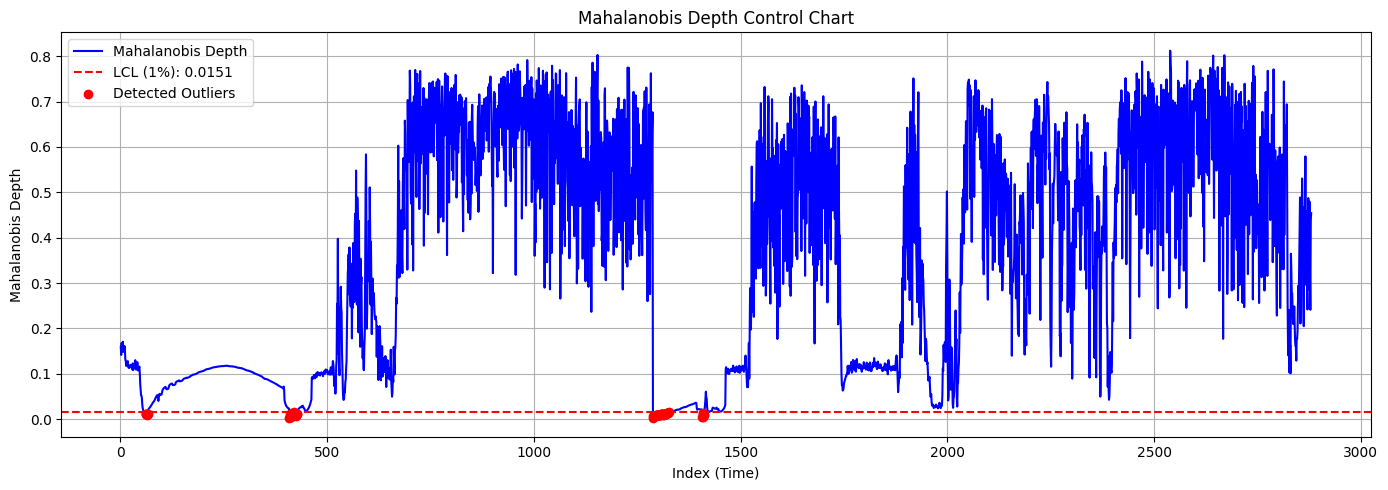


✅ 이상치 탐지 완료
전체 샘플 수: 2880
이상치로 탐지된 샘플 수: 67


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from hurst import compute_Hc

# 대표 변수 (클러스터별 대표 7개)
selected_variables = [
    'LA00259_dp', 'LA00586', 'LA00695_ref', 'LA00711_ref',
    'LA00719', 'LA01016', 'LA01027'
]

# ✅ 1. 정상 데이터만 필터링
normal_idx = df_2017['abnormal'] == 0
X_normal_balanced = df_selected_final_revised[normal_idx]

# ✅ 2. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_normal_balanced)

# ✅ 3. 평균 벡터, 공분산 행렬
mean_vec = np.mean(X_scaled, axis=0)
cov_matrix = np.cov(X_scaled, rowvar=False)

# ✅ 4. Mahalanobis Depth 계산 함수
def mahalanobis_depth(X, mean_vec, cov_matrix):
    inv_cov = np.linalg.inv(cov_matrix)
    diff = X - mean_vec
    dist_squared = np.einsum('ij,jk,ik->i', diff, inv_cov, diff)
    return 1.0 / (1.0 + dist_squared)

# ✅ 5. 정상 구간 기준 Depth 및 LCL
depth_normal = mahalanobis_depth(X_scaled, mean_vec, cov_matrix)
lcl = np.quantile(depth_normal, 0.01)

# ✅ 6. 전체 데이터 적용
X_all_scaled = scaler.transform(df_selected_final_revised)
depth_all = mahalanobis_depth(X_all_scaled, mean_vec, cov_matrix)
is_outlier = depth_all < lcl

# ✅ 7. 결과 저장
df_results = df_2017.copy()
df_results['MD_Depth'] = depth_all
df_results['is_outlier_depth(0.01)'] = is_outlier.astype(int)

# ✅ 8. 시각화
plt.figure(figsize=(14, 5))
plt.plot(df_results.index, df_results['MD_Depth'], label='Mahalanobis Depth', color='blue')
plt.axhline(y=lcl, color='red', linestyle='--', label=f'LCL (1%): {lcl:.4f}')
plt.scatter(df_results[df_results['is_outlier_depth(0.01)'] == 1].index,
            df_results.loc[df_results['is_outlier_depth(0.01)'] == 1, 'MD_Depth'],
            color='red', label='Detected Outliers', zorder=5)
plt.title("Mahalanobis Depth Control Chart")
plt.xlabel("Index (Time)")
plt.ylabel("Mahalanobis Depth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# 11. 이상치 요약 출력
print("\n✅ 이상치 탐지 완료")
print(f"전체 샘플 수: {len(df_results)}")
print(f"이상치로 탐지된 샘플 수: {df_results['is_outlier_depth(0.01)'].sum()}")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# 예측값: Mahalanobis Depth로 판단한 이상치 (1 = 이상, 0 = 정상)
y_pred = df_results['is_outlier_depth(0.01)']

# 실제값: abnormal 라벨
y_true = df_results['abnormal']

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("📊 Confusion Matrix:")
print(conf_matrix)

# 성능 리포트 출력
report = classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal'])
print("\n📋 Classification Report:")
print(report)

# (선택) Pandas DataFrame으로 보고 싶다면:
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal'], output_dict=True)).T

📊 Confusion Matrix:
[[2747   28]
 [  66   39]]

📋 Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.99      0.98      2775
    Abnormal       0.58      0.37      0.45       105

    accuracy                           0.97      2880
   macro avg       0.78      0.68      0.72      2880
weighted avg       0.96      0.97      0.96      2880



Phase1 - Harst x, LCL(5%)


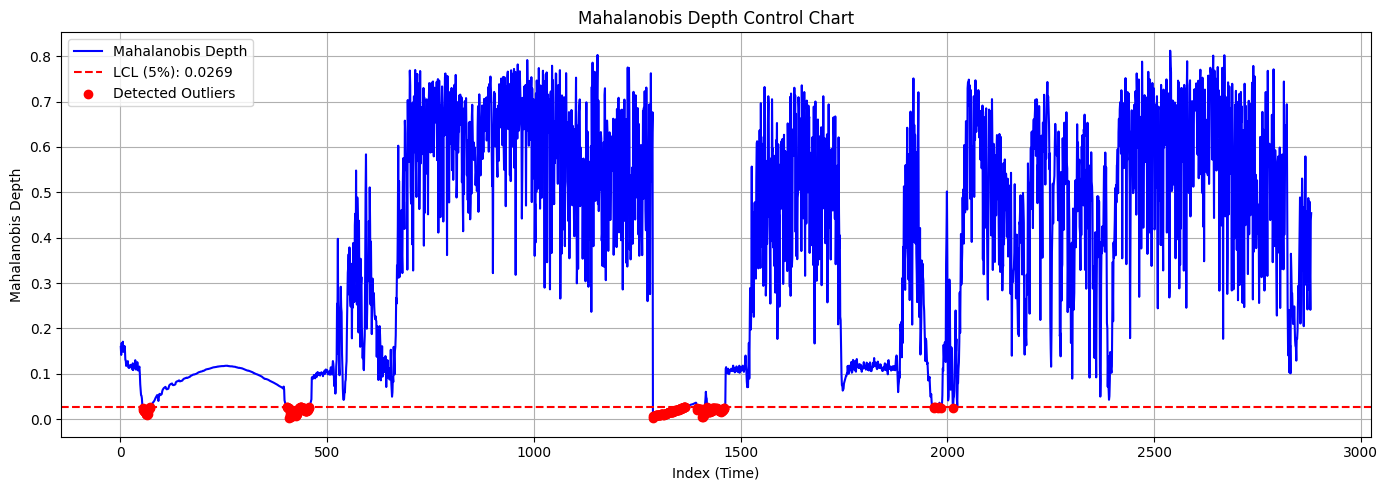


✅ 이상치 탐지 완료
전체 샘플 수: 2880
이상치로 탐지된 샘플 수: 218


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from hurst import compute_Hc

# 대표 변수 (클러스터별 대표 7개)
selected_variables = [
    'LA00259_dp', 'LA00586', 'LA00695_ref', 'LA00711_ref',
    'LA00719', 'LA01016', 'LA01027'
]

# ✅ 1. 정상 데이터만 필터링
normal_idx = df_2017['abnormal'] == 0
X_normal_balanced = df_selected_final_revised[normal_idx]

# ✅ 2. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_normal_balanced)

# ✅ 3. 평균 벡터, 공분산 행렬
mean_vec = np.mean(X_scaled, axis=0)
cov_matrix = np.cov(X_scaled, rowvar=False)

# ✅ 4. Mahalanobis Depth 계산 함수
def mahalanobis_depth(X, mean_vec, cov_matrix):
    inv_cov = np.linalg.inv(cov_matrix)
    diff = X - mean_vec
    dist_squared = np.einsum('ij,jk,ik->i', diff, inv_cov, diff)
    return 1.0 / (1.0 + dist_squared)

# ✅ 5. 정상 구간 기준 Depth 및 LCL
depth_normal = mahalanobis_depth(X_scaled, mean_vec, cov_matrix)
lcl = np.quantile(depth_normal, 0.05)

# ✅ 6. 전체 데이터 적용
X_all_scaled = scaler.transform(df_selected_final_revised)
depth_all = mahalanobis_depth(X_all_scaled, mean_vec, cov_matrix)
is_outlier = depth_all < lcl

# ✅ 7. 결과 저장
df_results = df_2017.copy()
df_results['MD_Depth'] = depth_all
df_results['is_outlier_depth(0.05)'] = is_outlier.astype(int)

# ✅ 8. 시각화
plt.figure(figsize=(14, 5))
plt.plot(df_results.index, df_results['MD_Depth'], label='Mahalanobis Depth', color='blue')
plt.axhline(y=lcl, color='red', linestyle='--', label=f'LCL (5%): {lcl:.4f}')
plt.scatter(df_results[df_results['is_outlier_depth(0.05)'] == 1].index,
            df_results.loc[df_results['is_outlier_depth(0.05)'] == 1, 'MD_Depth'],
            color='red', label='Detected Outliers', zorder=5)
plt.title("Mahalanobis Depth Control Chart")
plt.xlabel("Index (Time)")
plt.ylabel("Mahalanobis Depth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# 11. 이상치 요약 출력
print("\n✅ 이상치 탐지 완료")
print(f"전체 샘플 수: {len(df_results)}")
print(f"이상치로 탐지된 샘플 수: {df_results['is_outlier_depth(0.05)'].sum()}")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# 예측값: Mahalanobis Depth로 판단한 이상치 (1 = 이상, 0 = 정상)
y_pred = df_results['is_outlier_depth(0.05)']

# 실제값: abnormal 라벨
y_true = df_results['abnormal']

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("📊 Confusion Matrix:")
print(conf_matrix)

# 성능 리포트 출력
report = classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal'])
print("\n📋 Classification Report:")
print(report)

# (선택) Pandas DataFrame으로 보고 싶다면:
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal'], output_dict=True)).T

📊 Confusion Matrix:
[[2636  139]
 [  26   79]]

📋 Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97      2775
    Abnormal       0.36      0.75      0.49       105

    accuracy                           0.94      2880
   macro avg       0.68      0.85      0.73      2880
weighted avg       0.97      0.94      0.95      2880



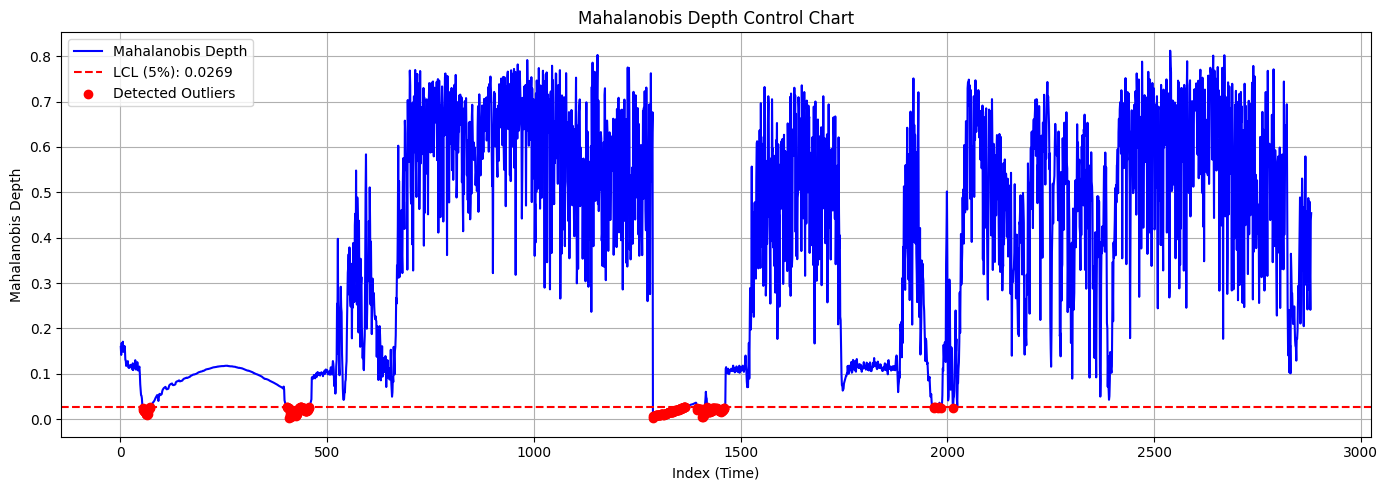


✅ 이상치 탐지 완료
전체 샘플 수: 2880
이상치로 탐지된 샘플 수: 218


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from hurst import compute_Hc

# 대표 변수 (클러스터별 대표 7개)
selected_variables = [
    'LA00259_dp', 'LA00586', 'LA00695_ref', 'LA00711_ref',
    'LA00719', 'LA01016', 'LA01027'
]

# ✅ 1. 정상 데이터만 필터링
normal_idx = df_2017['abnormal'] == 0
X_normal_balanced = df_selected_final_revised[normal_idx]

# ✅ 2. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_normal_balanced)

# ✅ 3. 평균 벡터, 공분산 행렬
mean_vec = np.mean(X_scaled, axis=0)
cov_matrix = np.cov(X_scaled, rowvar=False)

# ✅ 4. Mahalanobis Depth 계산 함수
def mahalanobis_depth(X, mean_vec, cov_matrix):
    inv_cov = np.linalg.inv(cov_matrix)
    diff = X - mean_vec
    dist_squared = np.einsum('ij,jk,ik->i', diff, inv_cov, diff)
    return 1.0 / (1.0 + dist_squared)

# ✅ 5. 정상 구간 기준 Depth 및 LCL
depth_normal = mahalanobis_depth(X_scaled, mean_vec, cov_matrix)
lcl = np.quantile(depth_normal, 0.05)

# ✅ 6. 전체 데이터 적용
X_all_scaled = scaler.transform(df_selected_final_revised)
depth_all = mahalanobis_depth(X_all_scaled, mean_vec, cov_matrix)
is_outlier = depth_all < lcl

# ✅ 7. 결과 저장
df_results = df_2017.copy()
df_results['MD_Depth'] = depth_all
df_results['is_outlier_depth(0.05)'] = is_outlier.astype(int)

# ✅ 8. 시각화
plt.figure(figsize=(14, 5))
plt.plot(df_results.index, df_results['MD_Depth'], label='Mahalanobis Depth', color='blue')
plt.axhline(y=lcl, color='red', linestyle='--', label=f'LCL (5%): {lcl:.4f}')
plt.scatter(df_results[df_results['is_outlier_depth(0.05)'] == 1].index,
            df_results.loc[df_results['is_outlier_depth(0.05)'] == 1, 'MD_Depth'],
            color='red', label='Detected Outliers', zorder=5)
plt.title("Mahalanobis Depth Control Chart")
plt.xlabel("Index (Time)")
plt.ylabel("Mahalanobis Depth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# 11. 이상치 요약 출력
print("\n✅ 이상치 탐지 완료")
print(f"전체 샘플 수: {len(df_results)}")
print(f"이상치로 탐지된 샘플 수: {df_results['is_outlier_depth(0.05)'].sum()}")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# 예측값: Mahalanobis Depth로 판단한 이상치 (1 = 이상, 0 = 정상)
y_pred = df_results['is_outlier_depth(0.05)']

# 실제값: abnormal 라벨
y_true = df_results['abnormal']

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("📊 Confusion Matrix:")
print(conf_matrix)

# 성능 리포트 출력
report = classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal'])
print("\n📋 Classification Report:")
print(report)

# (선택) Pandas DataFrame으로 보고 싶다면:
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal'], output_dict=True)).T

📊 Confusion Matrix:
[[2636  139]
 [  26   79]]

📋 Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97      2775
    Abnormal       0.36      0.75      0.49       105

    accuracy                           0.94      2880
   macro avg       0.68      0.85      0.73      2880
weighted avg       0.97      0.94      0.95      2880



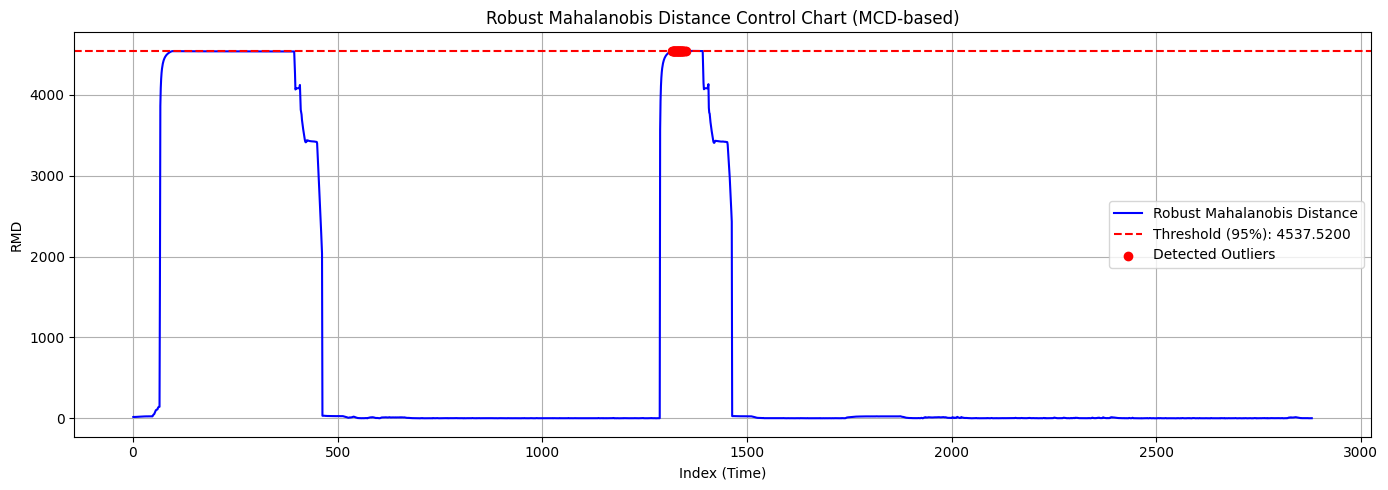

In [ ]:
from sklearn.covariance import MinCovDet
import numpy as np
# # 예: 초반, 중간, 후반에서 정상 샘플 추출
# train_idx = pd.concat([
#     df_2017.iloc[:500].query("abnormal == 0").sample(n=100, random_state=42),
#     df_2017.iloc[1000:1500].query("abnormal == 0").sample(n=100, random_state=42),
#     df_2017.iloc[-500:].query("abnormal == 0").sample(n=100, random_state=42)
# ])
# 1. Minimum Covariance Determinant 적용
mcd = MinCovDet().fit(df_selected_final_revised)

robust_mean = mcd.location_
robust_cov = mcd.covariance_

# 2. RMD 계산 함수
def robust_mahalanobis(X, mean_vec, cov_matrix):
    inv_cov = np.linalg.inv(cov_matrix)
    diff = X - mean_vec
    dist_squared = np.einsum('ij,jk,ik->i', diff, inv_cov, diff)
    return np.sqrt(dist_squared)

# 3. 정상 기준 RMD 및 threshold 계산 (상대 거리이므로 depth 대신 거리 기준으로)
rmd_normal = robust_mahalanobis(df_selected_final_revised.values, robust_mean, robust_cov)
rmd_threshold = np.quantile(rmd_normal, 0.95)  # 상위 5% 기준 (이상치 경계)

# 4. 전체 데이터에 적용
rmd_all = robust_mahalanobis(df_selected_final_revised, robust_mean, robust_cov)
is_outlier_rmd = rmd_all > rmd_threshold

# 5. 결과 저장
df_results['RMD'] = rmd_all
df_results['is_outlier_rmd95%'] = is_outlier_rmd.astype(int)

# 6. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df_results.index, df_results['RMD'], label='Robust Mahalanobis Distance', color='blue')
plt.axhline(y=rmd_threshold, color='red', linestyle='--', label=f'Threshold (95%): {rmd_threshold:.4f}')
plt.scatter(df_results[df_results['is_outlier_rmd'] == 1].index,
            df_results.loc[df_results['is_outlier_rmd'] == 1, 'RMD'],
            color='red', label='Detected Outliers', zorder=5)
plt.title("Robust Mahalanobis Distance Control Chart (MCD-based)")
plt.xlabel("Index (Time)")
plt.ylabel("RMD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# 예측값: Mahalanobis Depth로 판단한 이상치 (1 = 이상, 0 = 정상)
y_pred = df_results['is_outlier_rmd95%']

# 실제값: abnormal 라벨
y_true = df_results['abnormal']

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("📊 Confusion Matrix:")
print(conf_matrix)

# 성능 리포트 출력
report = classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal'])
print("\n📋 Classification Report:")
print(report)

# (선택) Pandas DataFrame으로 보고 싶다면:
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal'], output_dict=True)).T

📊 Confusion Matrix:
[[2709   66]
 [  27   78]]

📋 Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.98      0.98      2775
    Abnormal       0.54      0.74      0.63       105

    accuracy                           0.97      2880
   macro avg       0.77      0.86      0.80      2880
weighted avg       0.97      0.97      0.97      2880



여기서 plt.scatter()는 다음과 같이 동작합니다.

x 데이터: df_results[df_results['is_outlier_rmd'] == 1].index
이것은 is_outlier_rmd 컬럼의 값이 1인 행(이상치로 탐지된 행)들의 인덱스(시간 순서)를 가져옵니다. 이것이 산점도 마커의 x 좌표가 됩니다.
y 데이터: df_results.loc[df_results['is_outlier_rmd'] == 1, 'RMD']
이것은 is_outlier_rmd 컬럼의 값이 1인 행들의 'RMD' 컬럼 값을 가져옵니다. 이것이 산점도 마커의 y 좌표가 됩니다.
color='red': 이 산점도에 그려지는 모든 마커의 색상을 빨간색으로 설정합니다.
label='Detected Outliers (RMD)': 이 산점도에 대한 레이블을 설정하여 범례에 표시될 수 있도록 합니다.
zorder=5: 이 산점도를 다른 요소들(예: 파란색 RMD 라인, 빨간색 UCL 라인) 위에 그리도록 설정하여 눈에 잘 띄게 합니다.
따라서 이 scatter() 함수는 파란색 RMD 라인 위에, 이상치로 탐지된 특정 시점(인덱스)의 데이터 포인트들을 빨간색 점으로 겹쳐서 표시하는 역할을 수행합니다. 이렇게 하면 Control Chart 상에서 어떤 데이터 포인트가 이상치로 판단되었는지 시각적으로 쉽게 확인할 수 있습니다

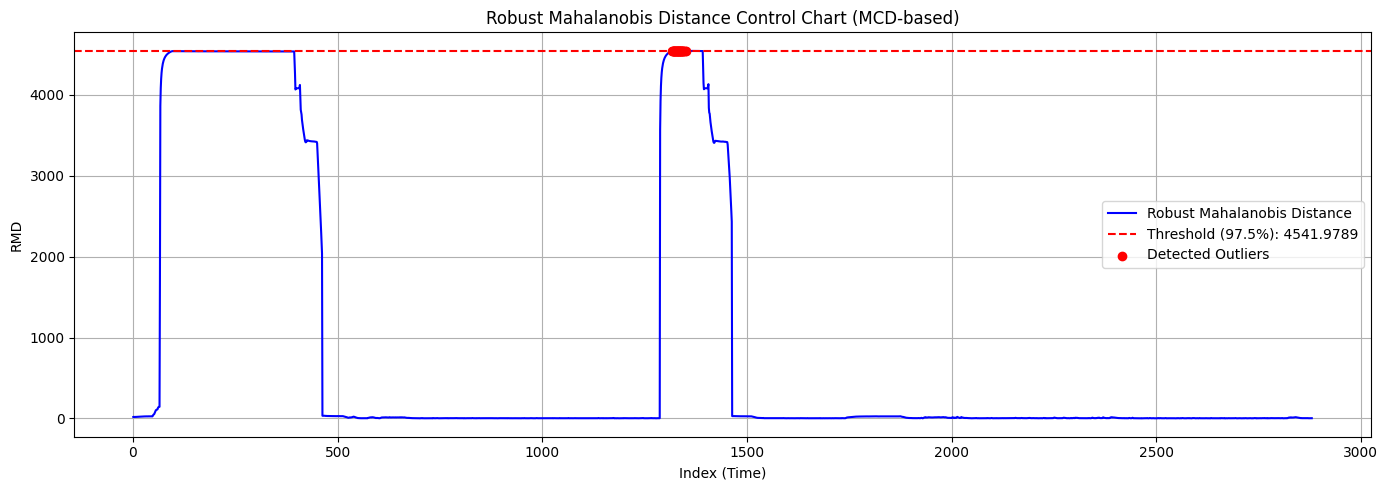

In [ ]:
from sklearn.covariance import MinCovDet
import numpy as np
# # 예: 초반, 중간, 후반에서 정상 샘플 추출
# train_idx = pd.concat([
#     df_2017.iloc[:500].query("abnormal == 0").sample(n=100, random_state=42),
#     df_2017.iloc[1000:1500].query("abnormal == 0").sample(n=100, random_state=42),
#     df_2017.iloc[-500:].query("abnormal == 0").sample(n=100, random_state=42)
# ])
# 1. Minimum Covariance Determinant 적용
mcd = MinCovDet().fit(df_selected_final_revised)

robust_mean = mcd.location_
robust_cov = mcd.covariance_

# 2. RMD 계산 함수
def robust_mahalanobis(X, mean_vec, cov_matrix):
    inv_cov = np.linalg.inv(cov_matrix)
    diff = X - mean_vec
    dist_squared = np.einsum('ij,jk,ik->i', diff, inv_cov, diff)
    return np.sqrt(dist_squared)

# 3. 정상 기준 RMD 및 threshold 계산 (상대 거리이므로 depth 대신 거리 기준으로)
rmd_normal = robust_mahalanobis(df_selected_final_revised.values, robust_mean, robust_cov)
rmd_threshold = np.quantile(rmd_normal, 0.975)  # 상위 5% 기준 (이상치 경계)

# 4. 전체 데이터에 적용
rmd_all = robust_mahalanobis(df_selected_final_revised, robust_mean, robust_cov)
is_outlier_rmd = rmd_all > rmd_threshold

# 5. 결과 저장
df_results['RMD'] = rmd_all
df_results['is_outlier_rmd97.5%'] = is_outlier_rmd.astype(int)

# 6. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df_results.index, df_results['RMD'], label='Robust Mahalanobis Distance', color='blue')
plt.axhline(y=rmd_threshold, color='red', linestyle='--', label=f'Threshold (97.5%): {rmd_threshold:.4f}')
plt.scatter(df_results[df_results['is_outlier_rmd'] == 1].index,
            df_results.loc[df_results['is_outlier_rmd'] == 1, 'RMD'],
            color='red', label='Detected Outliers', zorder=5)
plt.title("Robust Mahalanobis Distance Control Chart (MCD-based)")
plt.xlabel("Index (Time)")
plt.ylabel("RMD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# 예측값: Mahalanobis Depth로 판단한 이상치 (1 = 이상, 0 = 정상)
y_pred = df_results['is_outlier_rmd97.5%']

# 실제값: abnormal 라벨
y_true = df_results['abnormal']

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("📊 Confusion Matrix:")
print(conf_matrix)

# 성능 리포트 출력
report = classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal'])
print("\n📋 Classification Report:")
print(report)

# (선택) Pandas DataFrame으로 보고 싶다면:
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal'], output_dict=True)).T

📊 Confusion Matrix:
[[2775    0]
 [  33   72]]

📋 Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99      2775
    Abnormal       1.00      0.69      0.81       105

    accuracy                           0.99      2880
   macro avg       0.99      0.84      0.90      2880
weighted avg       0.99      0.99      0.99      2880



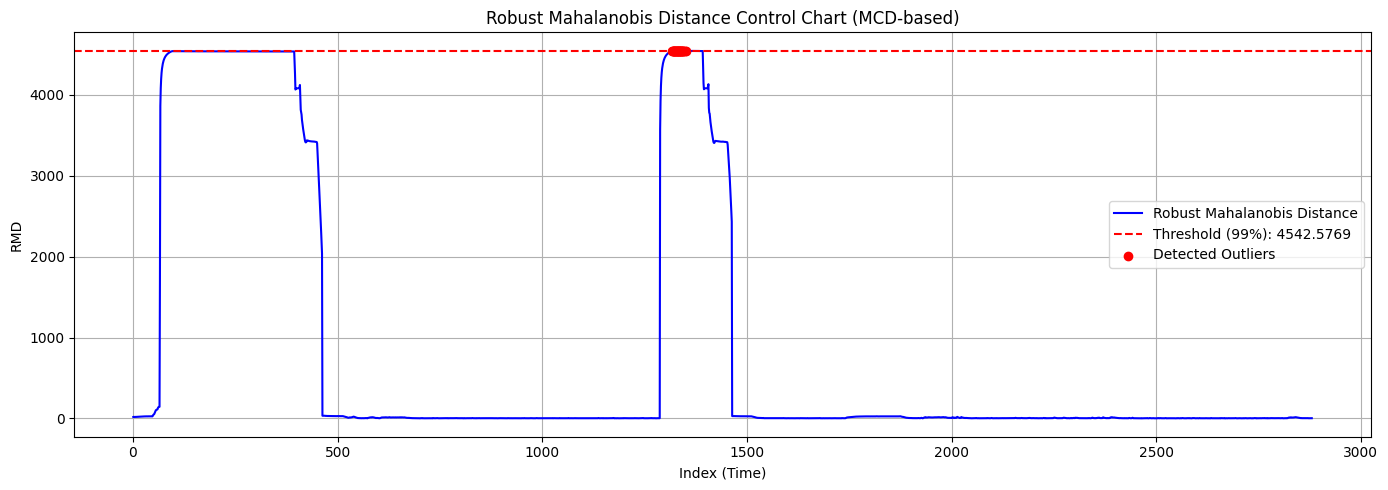

In [ ]:
from sklearn.covariance import MinCovDet
import numpy as np
# # 예: 초반, 중간, 후반에서 정상 샘플 추출
# train_idx = pd.concat([
#     df_2017.iloc[:500].query("abnormal == 0").sample(n=100, random_state=42),
#     df_2017.iloc[1000:1500].query("abnormal == 0").sample(n=100, random_state=42),
#     df_2017.iloc[-500:].query("abnormal == 0").sample(n=100, random_state=42)
# ])
# 1. Minimum Covariance Determinant 적용
mcd = MinCovDet().fit(df_selected_final_revised)

robust_mean = mcd.location_
robust_cov = mcd.covariance_

# 2. RMD 계산 함수
def robust_mahalanobis(X, mean_vec, cov_matrix):
    inv_cov = np.linalg.inv(cov_matrix)
    diff = X - mean_vec
    dist_squared = np.einsum('ij,jk,ik->i', diff, inv_cov, diff)
    return np.sqrt(dist_squared)

# 3. 정상 기준 RMD 및 threshold 계산 (상대 거리이므로 depth 대신 거리 기준으로)
rmd_normal = robust_mahalanobis(df_selected_final_revised.values, robust_mean, robust_cov)
rmd_threshold = np.quantile(rmd_normal, 0.99)  # 상위 5% 기준 (이상치 경계)

# 4. 전체 데이터에 적용
rmd_all = robust_mahalanobis(df_selected_final_revised, robust_mean, robust_cov)
is_outlier_rmd = rmd_all > rmd_threshold

# 5. 결과 저장
df_results['RMD'] = rmd_all
df_results['is_outlier_rmd99%'] = is_outlier_rmd.astype(int)

# 6. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df_results.index, df_results['RMD'], label='Robust Mahalanobis Distance', color='blue')
plt.axhline(y=rmd_threshold, color='red', linestyle='--', label=f'Threshold (99%): {rmd_threshold:.4f}')
plt.scatter(df_results[df_results['is_outlier_rmd'] == 1].index,
            df_results.loc[df_results['is_outlier_rmd'] == 1, 'RMD'],
            color='red', label='Detected Outliers', zorder=5)
plt.title("Robust Mahalanobis Distance Control Chart (MCD-based)")
plt.xlabel("Index (Time)")
plt.ylabel("RMD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# 예측값: Mahalanobis Depth로 판단한 이상치 (1 = 이상, 0 = 정상)
y_pred = df_results['is_outlier_rmd99%']

# 실제값: abnormal 라벨
y_true = df_results['abnormal']

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("📊 Confusion Matrix:")
print(conf_matrix)

# 성능 리포트 출력
report = classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal'])
print("\n📋 Classification Report:")
print(report)

# (선택) Pandas DataFrame으로 보고 싶다면:
report_df = pd.DataFrame(classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal'], output_dict=True)).T

📊 Confusion Matrix:
[[2775    0]
 [  76   29]]

📋 Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      1.00      0.99      2775
    Abnormal       1.00      0.28      0.43       105

    accuracy                           0.97      2880
   macro avg       0.99      0.64      0.71      2880
weighted avg       0.97      0.97      0.97      2880

